In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import networkx as nx
from networkx.algorithms import community

In [2]:
ego_alter_profiles = pd.read_csv("../Data/EgoAlterProfiles.txt", sep = '\t')

In [3]:
ego_alter_profiles

ID  IsEgo  followers_count  friends_count  statuses_count  \
0              1   True             30.0             28             9.0   
1              2   True              2.0              8             7.0   
2              3   True              1.0              0             0.0   
3              4   True              3.0              3            68.0   
4              5   True             65.0            118           748.0   
...          ...    ...              ...            ...             ...   
2516185  2516186  False           5129.0            191           403.0   
2516186  2516187  False           6694.0             11          1523.0   
2516187  2516188  False           6651.0            216          7141.0   
2516188  2516189  False             21.0             59            33.0   
2516189  2516190  False             35.0             19             3.0   

         utc_offset lang                      created_at  protected  
0               NaN   en  Wed Oct 26 03:30:32 +0000 2011      False  
1          -14400.0   en  Mon Jul 27 20:46:32 +0000 2009      False  
2               NaN   fr  Mon Apr 23 20:57:26 +0000 2012      False  
3               NaN   en  Sun Feb 14 07:50:39 +0000 2010      False  
4               NaN   fr  Mon Jun 11 14:17:06 +0000 2012      False  
...             ...  ...                             ...        ...  
2516185     10800.0   ar  Mon Jun 23 22:56:28 +0000 2014      False  
2516186    -14400.0   en  Wed Jul 08 09:10:18 +0000 2009      False  
2516187    -18000.0   en  Thu Jun 16 00:06:46 +0000 2011      False  
2516188         NaN   en  Fri Nov 30 05:31:27 +0000 2012      False  
2516189         NaN   en  Wed Jan 08 10:25:43 +0000 2014      False  

[2516190 rows x 9 columns]

In [54]:
ego_alter_profiles['lang'] = ego_alter_profiles['lang'].str.lower()
languages_count = ego_alter_profiles.groupby('lang')['ID'].count().reset_index(name = 'count')
small_language = languages_count[languages_count['count'] < 1000]['lang'].to_list()

languages = ego_alter_profiles[ ~ego_alter_profiles['lang'].isin(small_language) ].reset_index(drop = True)
languages = languages[['ID', 'followers_count', 'friends_count', 'statuses_count', 'lang']]
languages = languages.dropna()

western_language = ['cs', 'fi', 'sv', 'pl', 'da', 'ru', 'fr', 'ca', 'nl', 'de', 'pt', 'it', 'es', 'en-gb', 'en']
eastern_language = ['ar', 'id', 'tr', 'zh-tw', 'zh-cn', 'ja', 'th', 'ko', 'fil', 'msa']

def classify_lang(lang):
    if lang in western_language:
        return 'West'
    if lang in eastern_language:
        return 'East'

languages['area'] = languages['lang'].apply(classify_lang)
languages.head()

ID  followers_count  friends_count  statuses_count lang  area
0   1             30.0             28             9.0   en  West
1   2              2.0              8             7.0   en  West
2   3              1.0              0             0.0   fr  West
3   4              3.0              3            68.0   en  West
4   5             65.0            118           748.0   fr  West

In [55]:
languages_stat = (languages.groupby('lang')[['followers_count', 'friends_count', 'statuses_count']]
.mean()
.reset_index())

languages_count_dict = dict(zip(languages_count['lang'], languages_count['count']))

def add_count(lang):
    return languages_count_dict[lang]

languages_stat['user_count'] = languages_stat['lang'].apply(add_count)
languages_stat['area'] = languages_stat['lang'].apply(classify_lang)
languages_stat.set_index('lang', inplace = True)
languages_stat.sort_values(by = 'user_count', inplace = True)

languages_stat.head()

followers_count  friends_count  statuses_count  user_count  area
lang                                                                   
cs         1363.242334    1056.112760      778.994065        1011  West
fil        1759.088619     504.051260     1448.437011        1151  East
zh-tw      2899.191342     675.664935     1365.651082        1155  East
msa        2034.100775    1085.580534     2869.555556        1161  East
da         3067.575322    1190.956851     2212.190008        1321  West

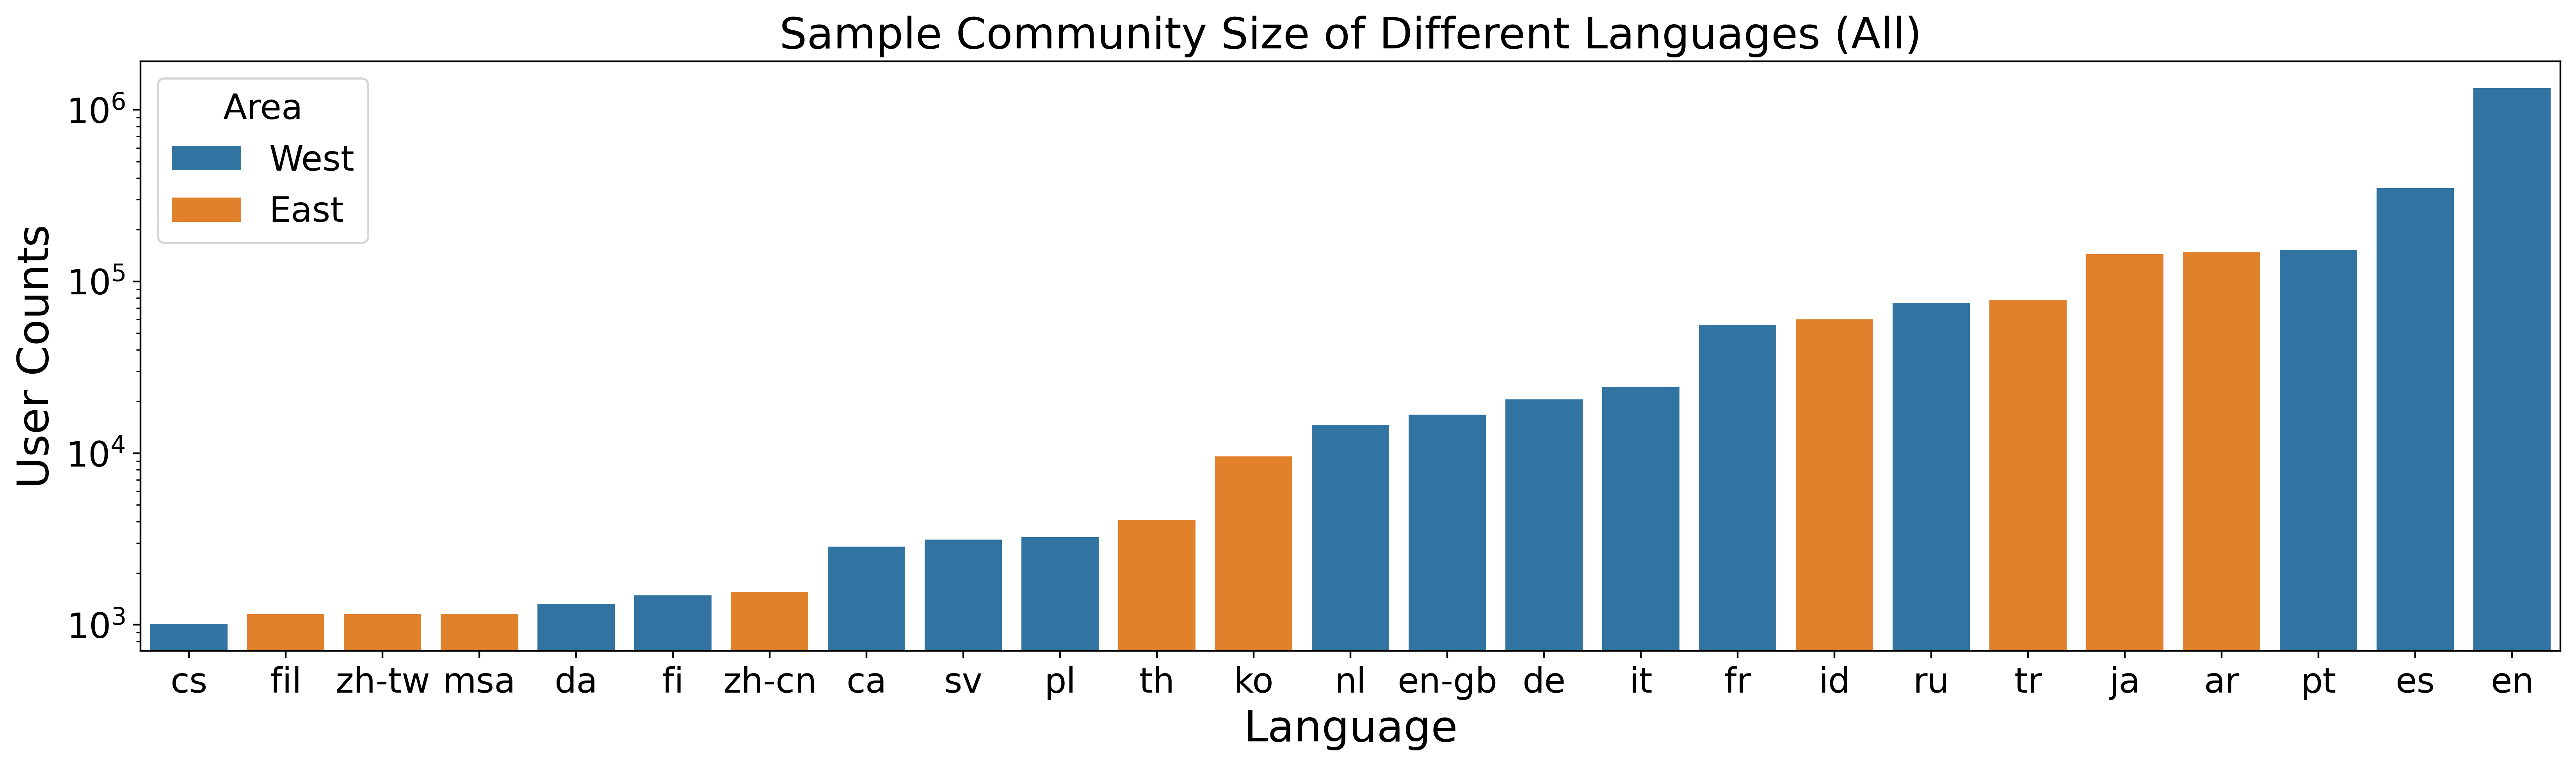

In [90]:
fig, ax = plt.subplots(figsize = (20, 5), dpi = 400)

ax.set(yscale = 'log')
sns.barplot(x = languages_stat.index, y = languages_stat['user_count'], hue = languages_stat['area'], ax = ax,
           dodge = False)
ax.set_xlabel('Language', fontsize = 20)
ax.set_ylabel('User Counts', fontsize = 20)
ax.set_title('Sample Community Size of Different Languages (All)', fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.legend(title="Area", fontsize=16, title_fontsize=16)

plt.show()

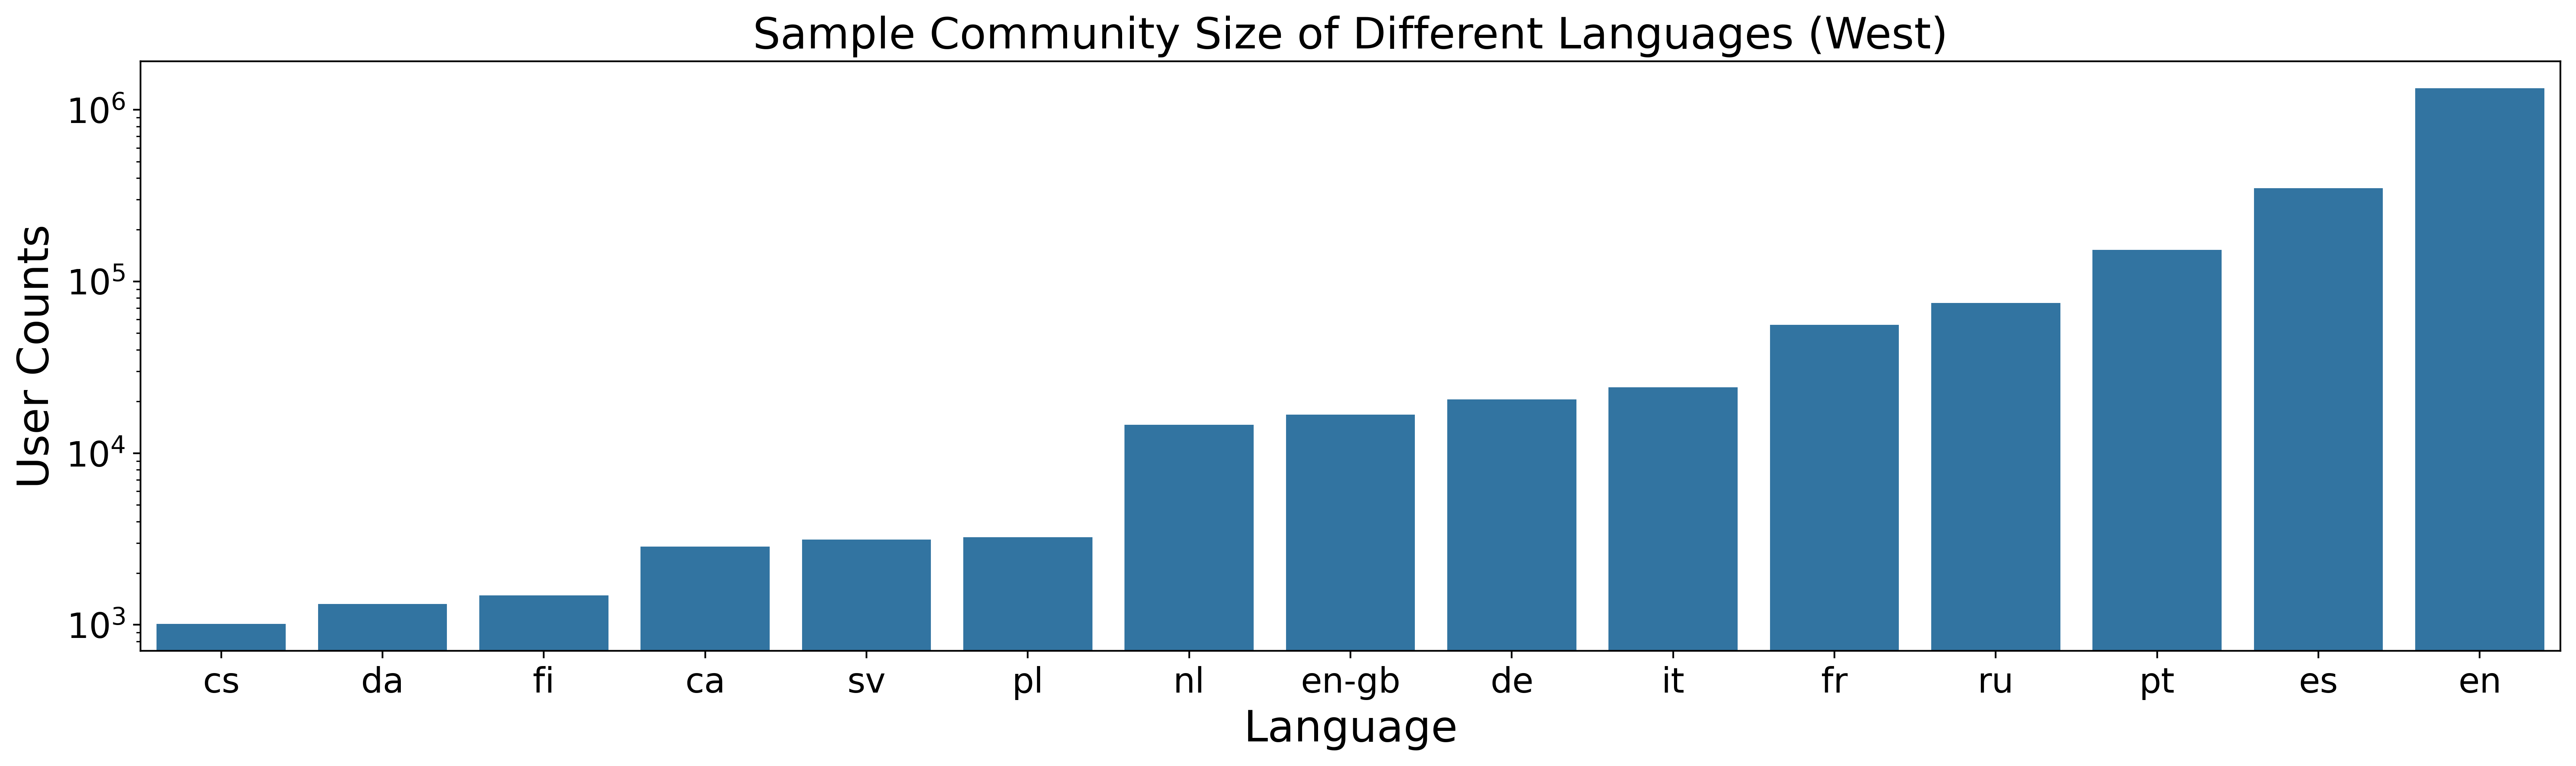

In [91]:
fig, ax = plt.subplots(figsize = (20, 5), dpi = 400)

languages_stat_west = languages_stat[languages_stat['area']=='West']

ax.set(yscale = 'log')
sns.barplot(x = languages_stat_west.index, y = languages_stat_west['user_count'], 
            color = sns.color_palette()[0], ax = ax, dodge = False)
ax.set_xlabel('Language', fontsize = 20)
ax.set_ylabel('User Counts', fontsize = 20)
ax.set_title('Sample Community Size of Different Languages (West)', fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

plt.show()

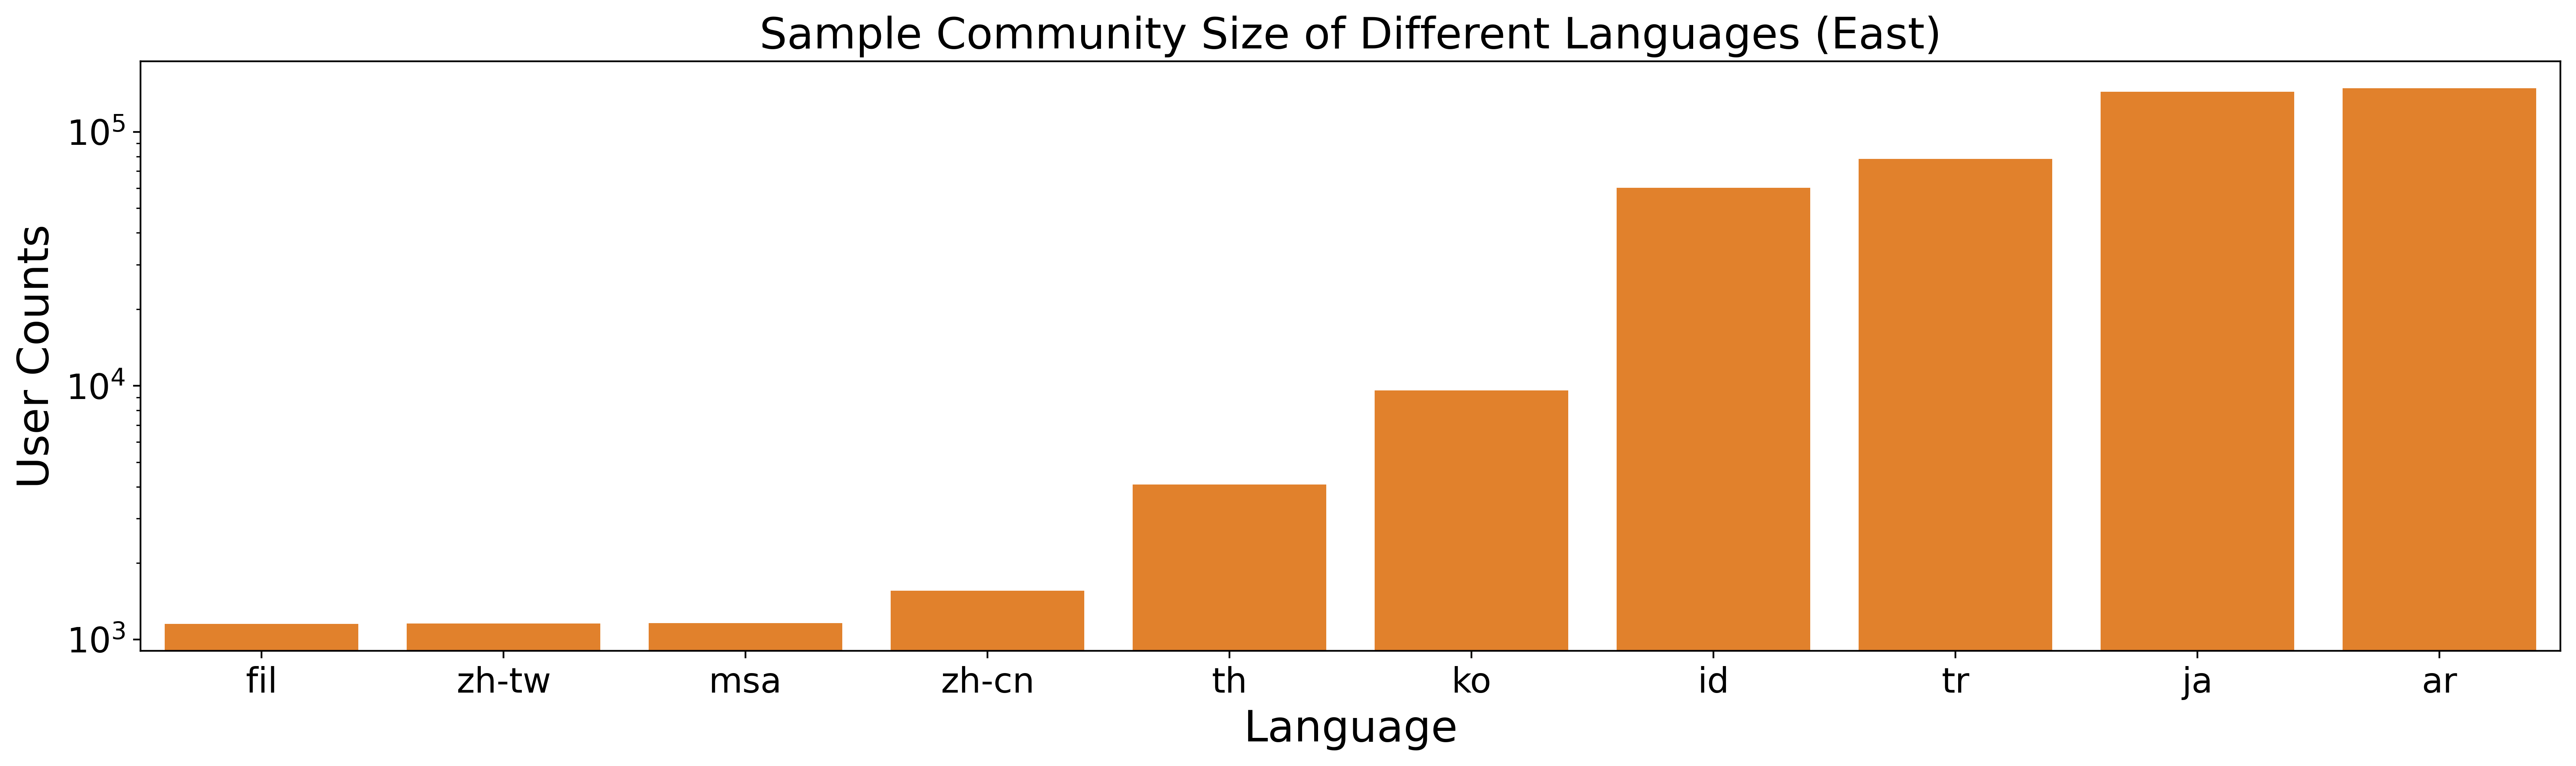

In [92]:
fig, ax = plt.subplots(figsize = (20, 5), dpi = 400)

languages_stat_east = languages_stat[languages_stat['area']=='East']

ax.set(yscale = 'log')
sns.barplot(x = languages_stat_east.index, y = languages_stat_east['user_count'], 
            color = sns.color_palette()[1], ax = ax, dodge = False)
ax.set_xlabel('Language', fontsize = 20)
ax.set_ylabel('User Counts', fontsize = 20)
ax.set_title('Sample Community Size of Different Languages (East)', fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

plt.show()

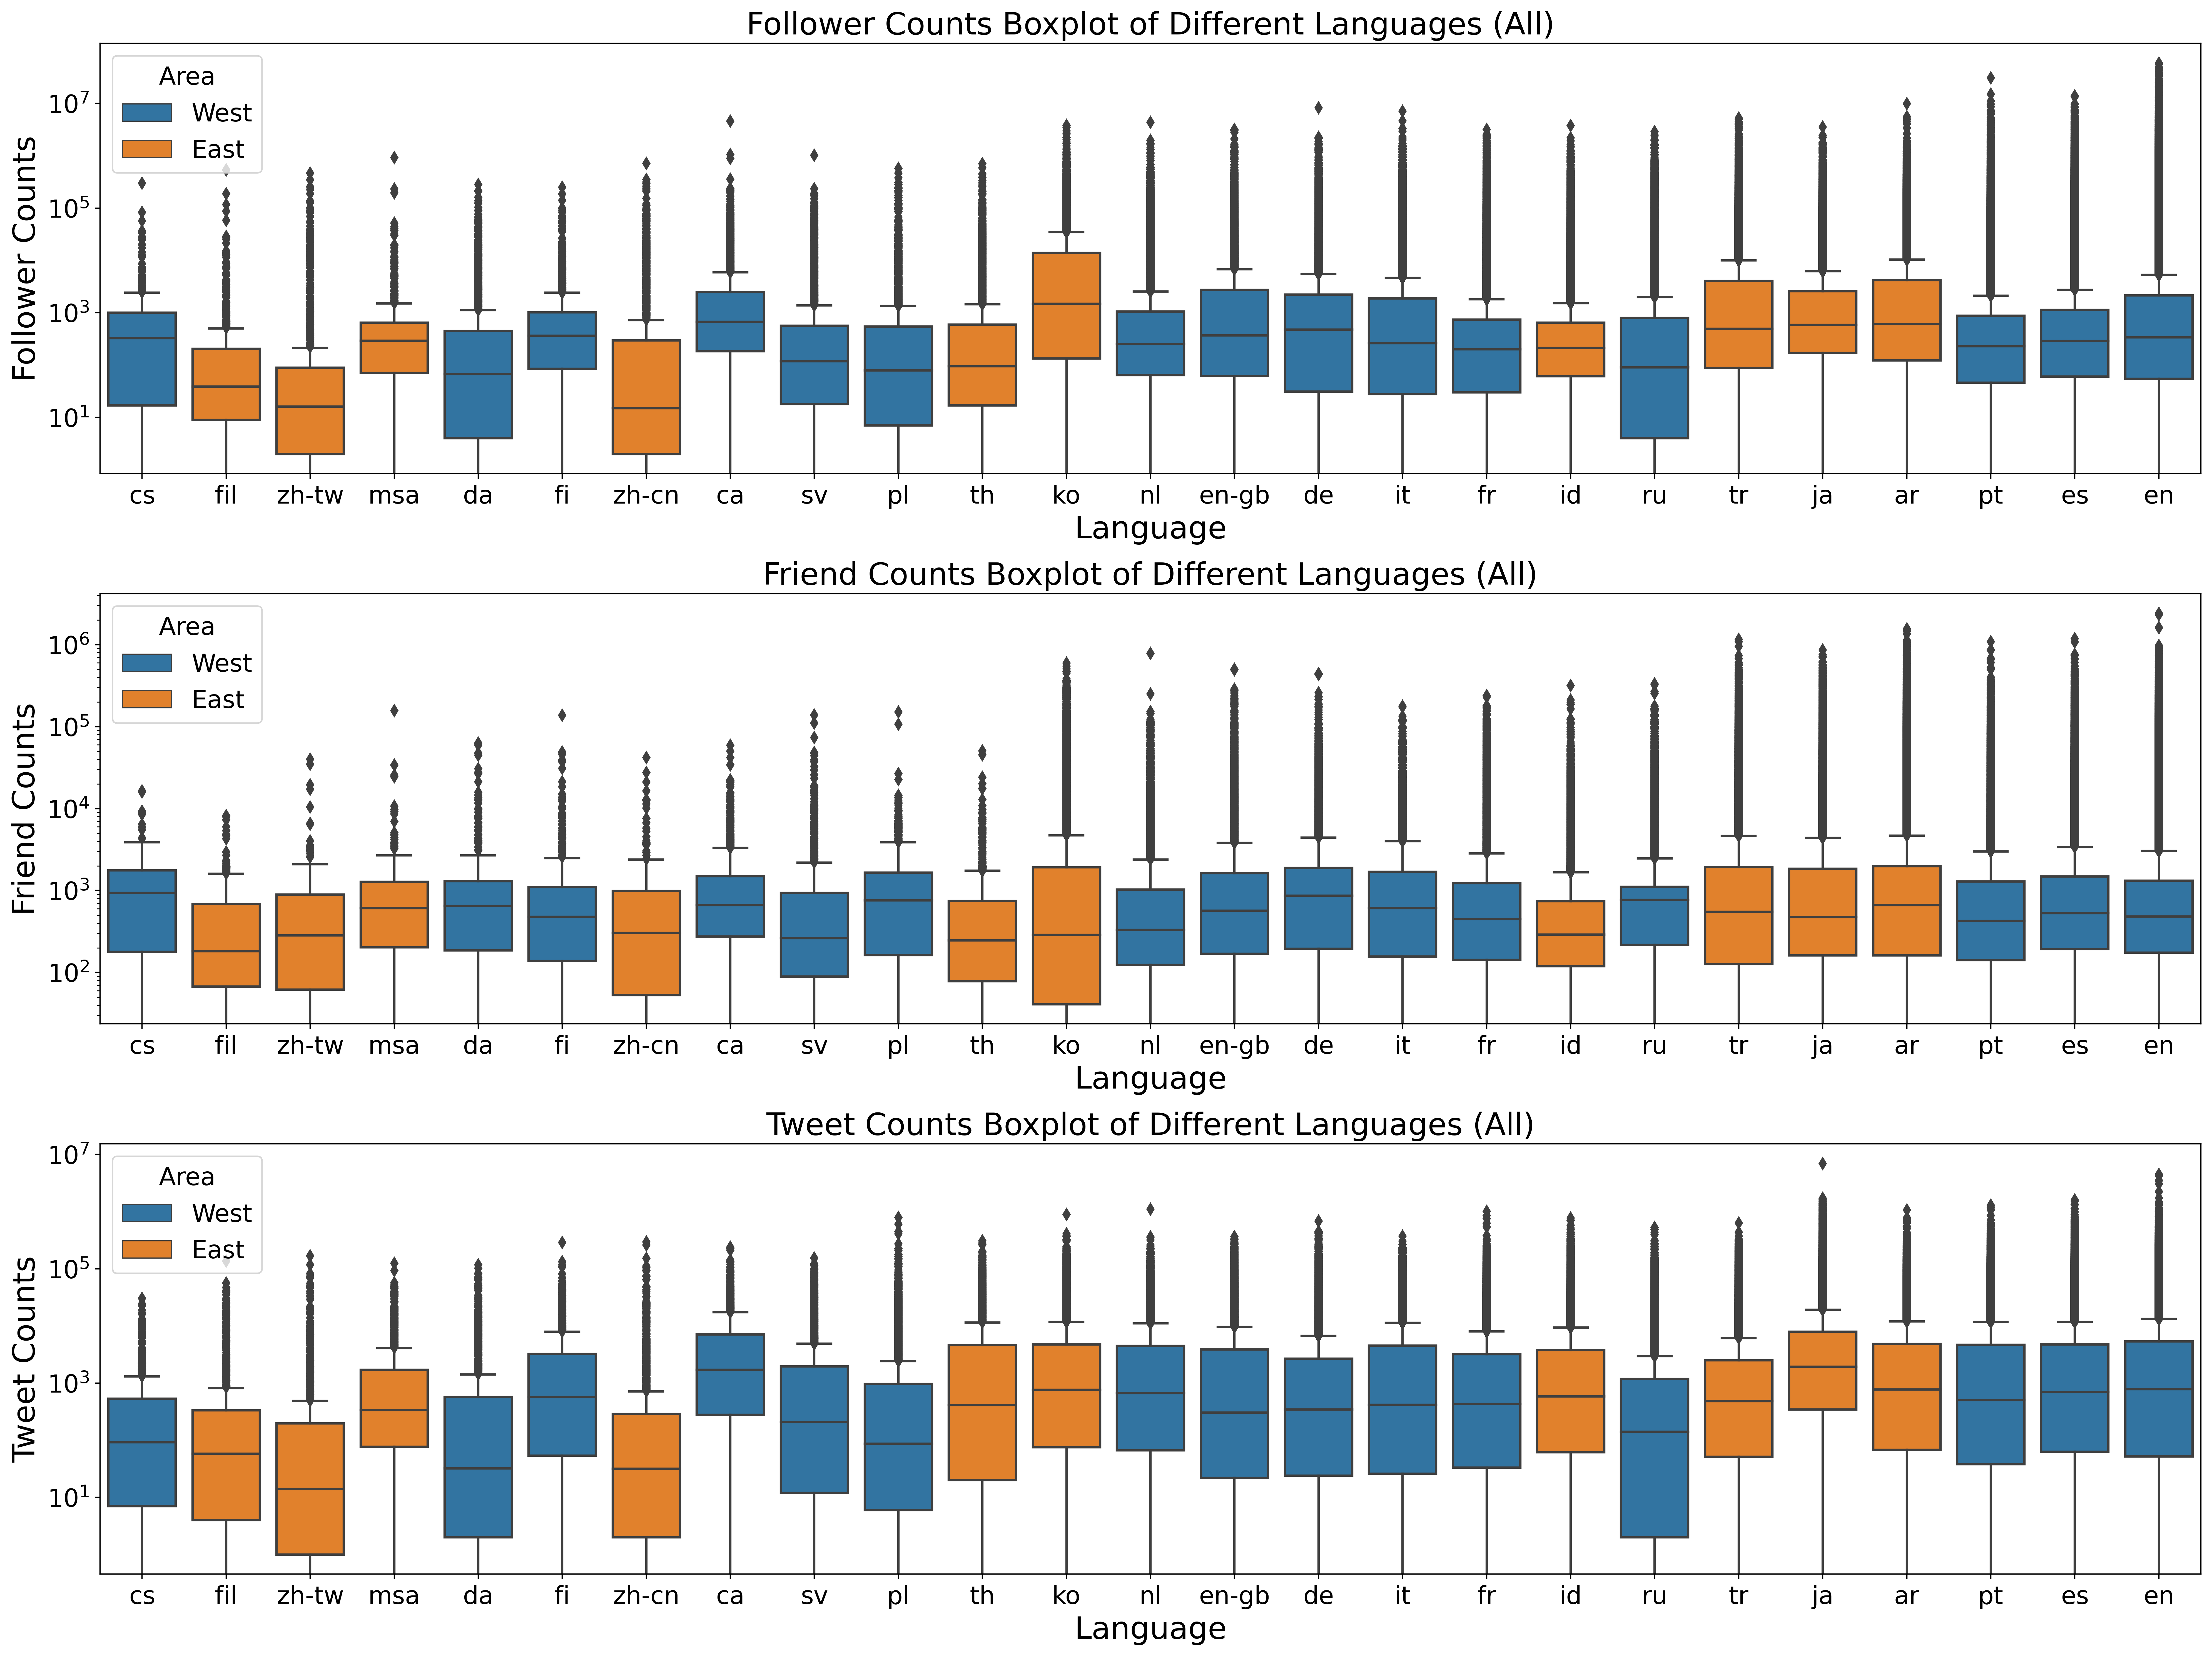

In [94]:
language_order = languages_stat.index.tolist()

fig, ax = plt.subplots(3, 1, figsize = (20, 15), dpi = 400)

ax[0].set(yscale="log")
sns.boxplot(x = 'lang', y = 'followers_count', data = languages, order = language_order, ax = ax[0],
           hue = 'area', dodge = False)
ax[0].set_xlabel('Language', fontsize = 20)
ax[0].set_ylabel('Follower Counts', fontsize = 20)
ax[0].set_title('Follower Counts Boxplot of Different Languages (All)', fontsize=20)
ax[0].xaxis.set_tick_params(labelsize=16)
ax[0].yaxis.set_tick_params(labelsize=16)
ax[0].legend(title="Area", fontsize=16, title_fontsize=16, loc = 2)

ax[1].set(yscale="log")
sns.boxplot(x = 'lang', y = 'friends_count', data = languages, order = language_order, ax = ax[1],
           hue = 'area', dodge = False)
ax[1].set_xlabel('Language', fontsize = 20)
ax[1].set_ylabel('Friend Counts', fontsize = 20)
ax[1].set_title('Friend Counts Boxplot of Different Languages (All)', fontsize=20)
ax[1].xaxis.set_tick_params(labelsize=16)
ax[1].yaxis.set_tick_params(labelsize=16)
ax[1].legend(title="Area", fontsize=16, title_fontsize=16, loc = 2)

ax[2].set(yscale="log")
sns.boxplot(x = 'lang', y = 'statuses_count', data = languages, order = language_order, ax = ax[2],
           hue = 'area', dodge = False)
ax[2].set_xlabel('Language', fontsize = 20)
ax[2].set_ylabel('Tweet Counts', fontsize = 20)
ax[2].set_title('Tweet Counts Boxplot of Different Languages (All)', fontsize=20)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=16)
ax[2].legend(title="Area", fontsize=16, title_fontsize=16, loc = 2)

fig.tight_layout()
plt.show()

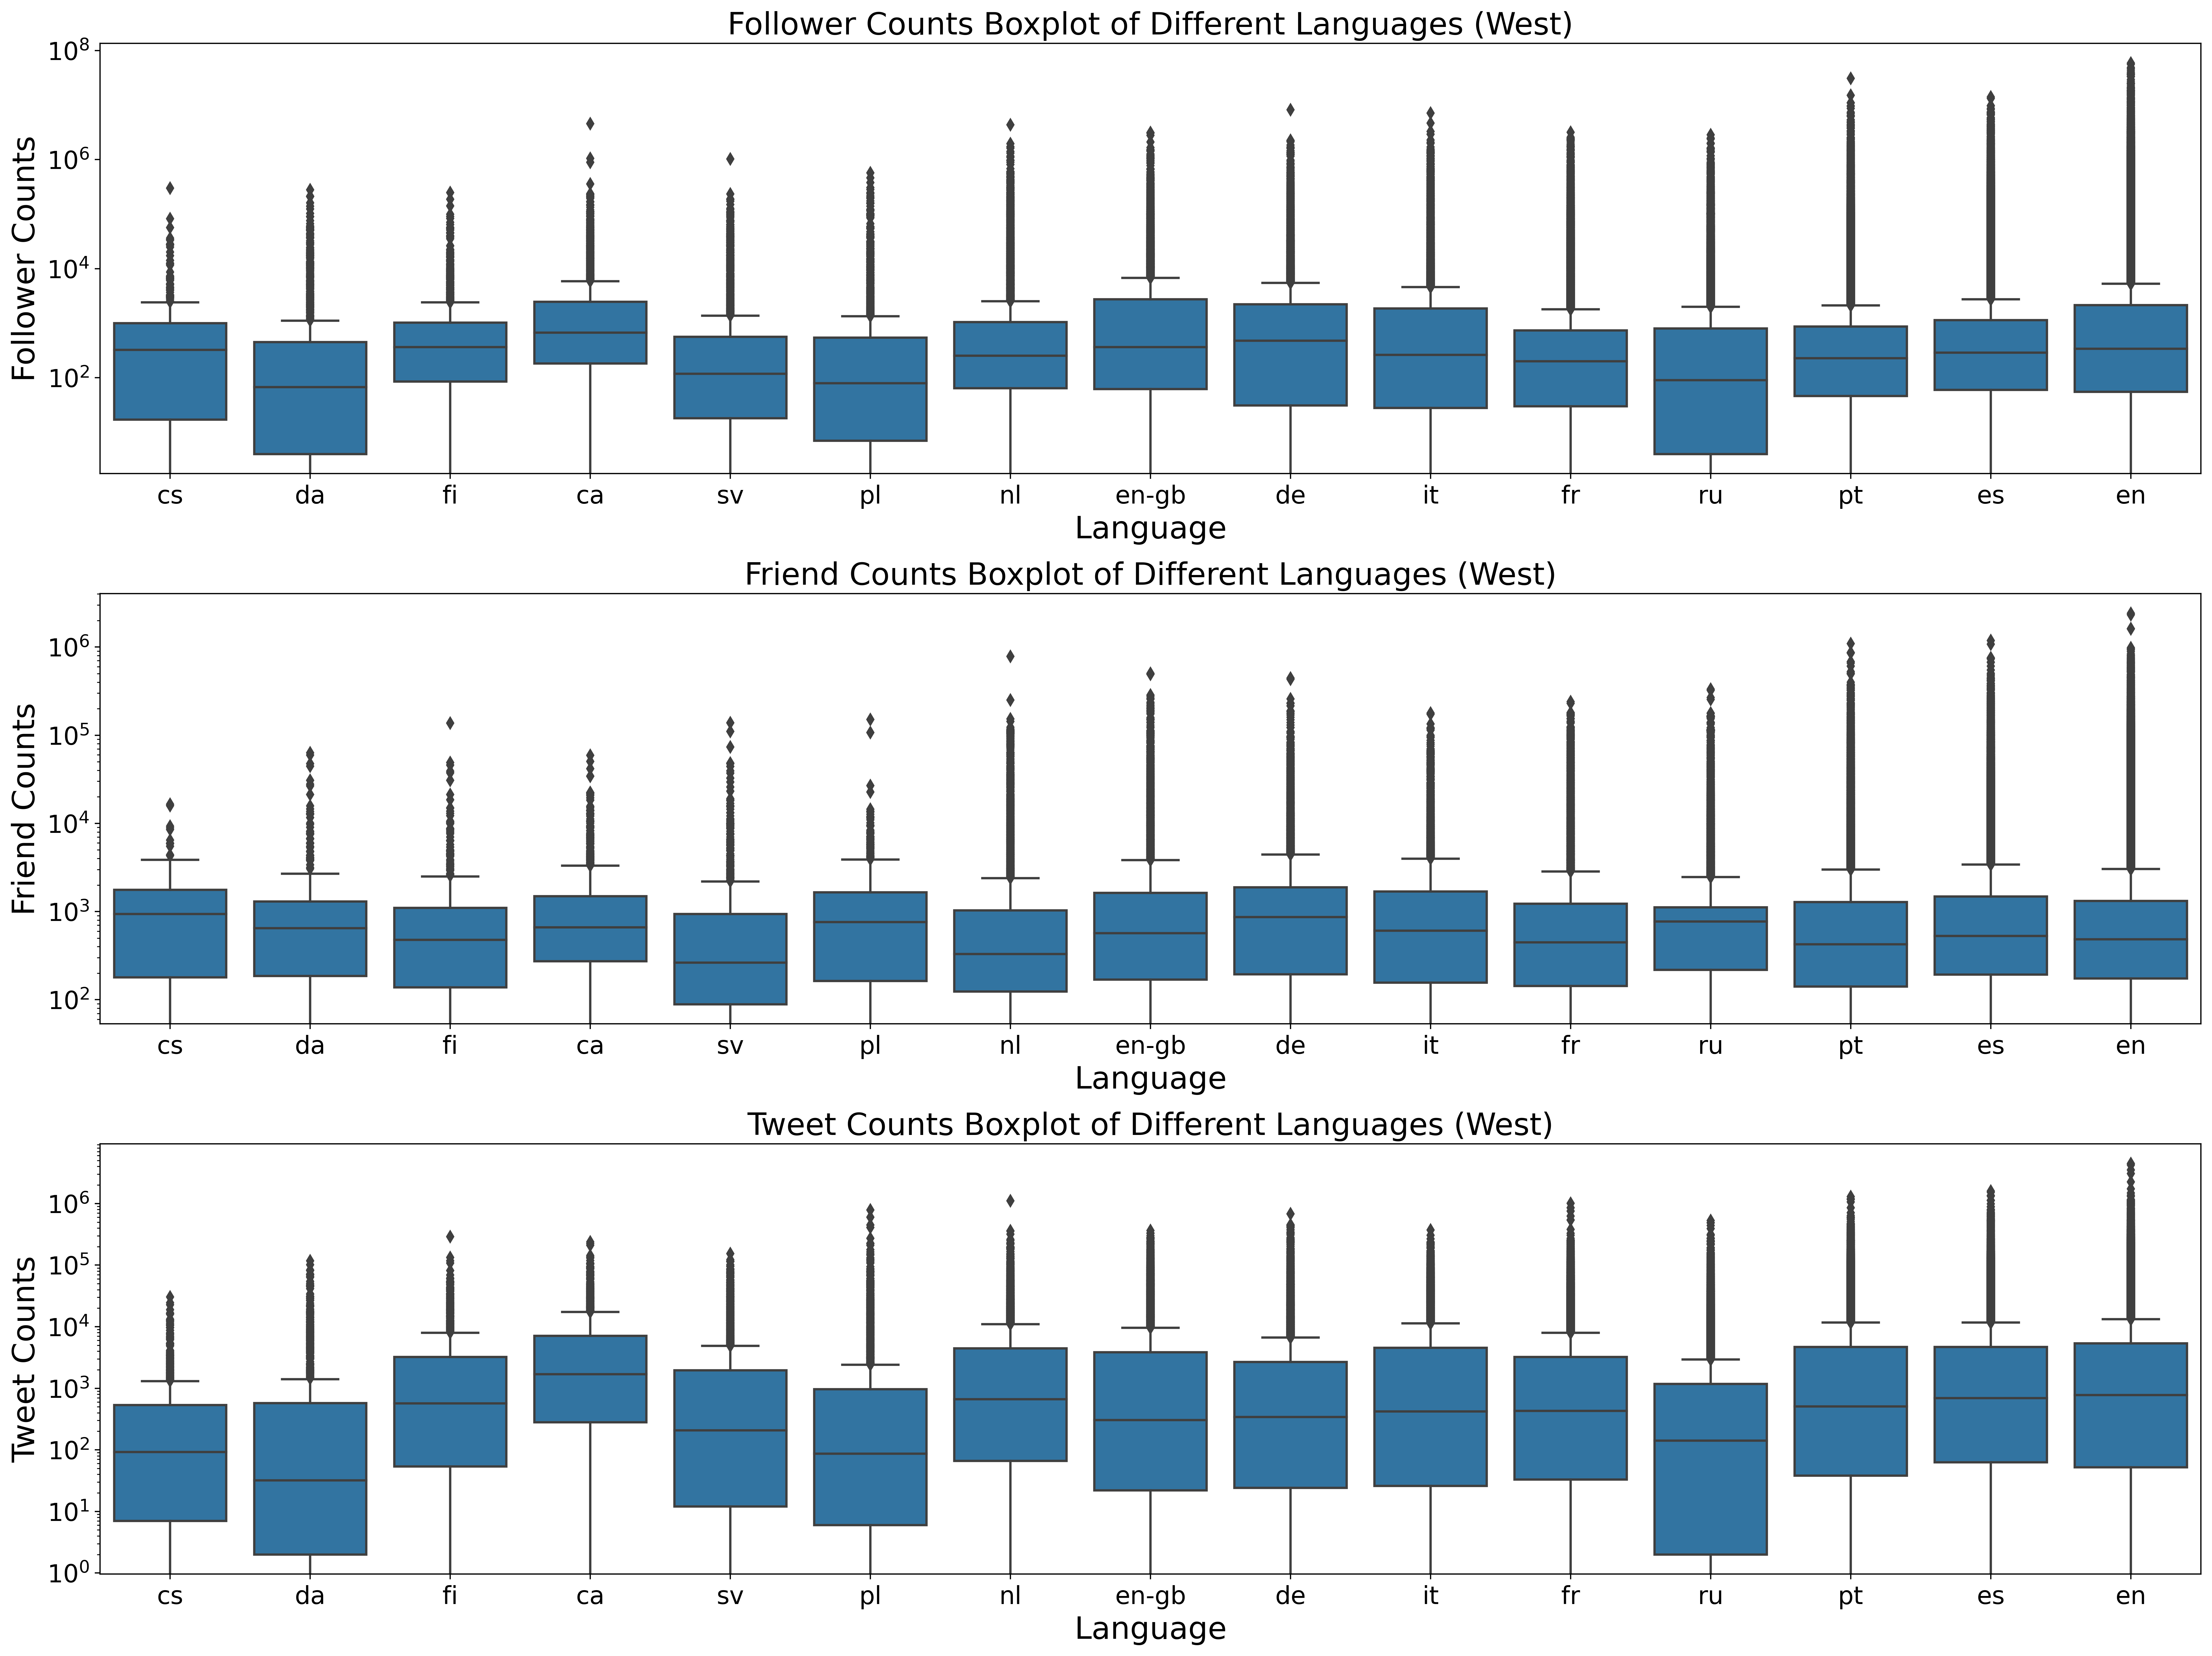

In [103]:
languages_west = languages[languages['area'] == 'West']
language_order = languages_stat_west.index.tolist()

fig, ax = plt.subplots(3, 1, figsize = (20, 15), dpi = 400)

ax[0].set(yscale="log")
sns.boxplot(x = 'lang', y = 'followers_count', data = languages_west, order = language_order, ax = ax[0],
            dodge = False, color = sns.color_palette()[0])
ax[0].set_xlabel('Language', fontsize = 20)
ax[0].set_ylabel('Follower Counts', fontsize = 20)
ax[0].set_title('Follower Counts Boxplot of Different Languages (West)', fontsize=20)
ax[0].xaxis.set_tick_params(labelsize=16)
ax[0].yaxis.set_tick_params(labelsize=16)

ax[1].set(yscale="log")
sns.boxplot(x = 'lang', y = 'friends_count', data = languages_west, order = language_order, ax = ax[1],
           dodge = False, color = sns.color_palette()[0])
ax[1].set_xlabel('Language', fontsize = 20)
ax[1].set_ylabel('Friend Counts', fontsize = 20)
ax[1].set_title('Friend Counts Boxplot of Different Languages (West)', fontsize=20)
ax[1].xaxis.set_tick_params(labelsize=16)
ax[1].yaxis.set_tick_params(labelsize=16)

ax[2].set(yscale="log")
sns.boxplot(x = 'lang', y = 'statuses_count', data = languages_west, order = language_order, ax = ax[2],
           dodge = False, color = sns.color_palette()[0])
ax[2].set_xlabel('Language', fontsize = 20)
ax[2].set_ylabel('Tweet Counts', fontsize = 20)
ax[2].set_title('Tweet Counts Boxplot of Different Languages (West)', fontsize=20)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=16)

fig.tight_layout()
plt.show()

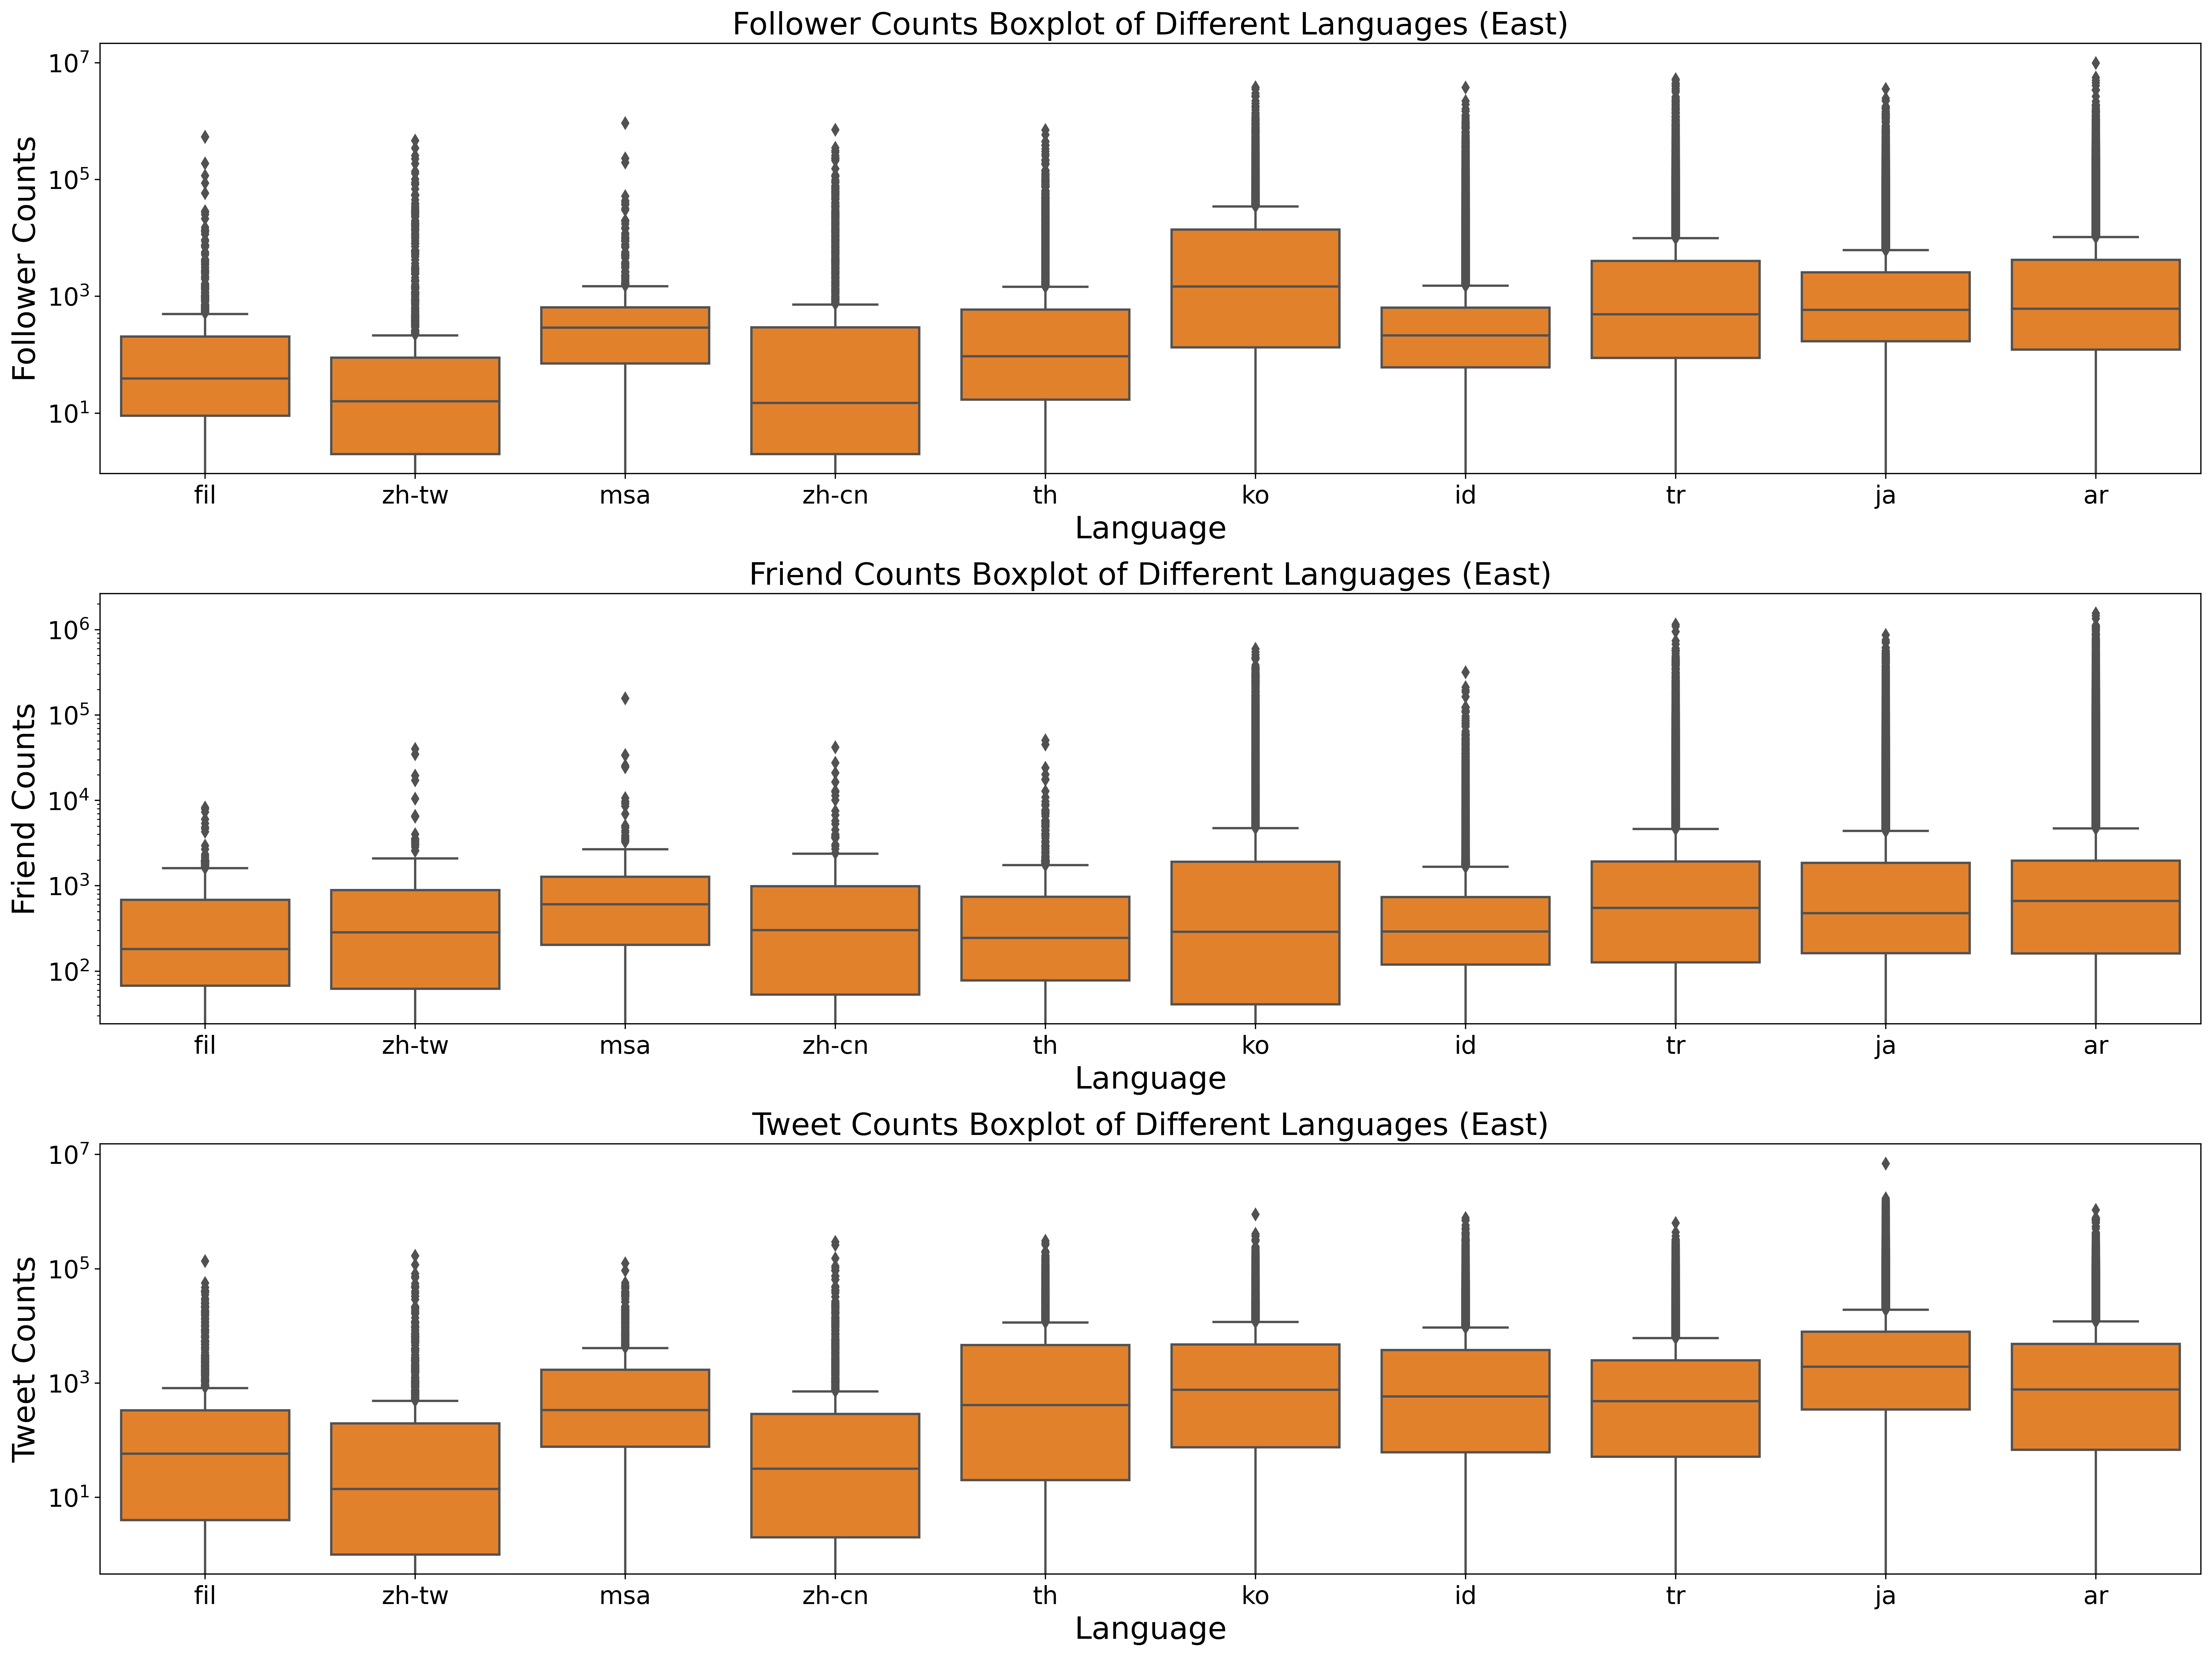

In [104]:
languages_east = languages[languages['area'] == 'East']
language_order = languages_stat_east.index.tolist()

fig, ax = plt.subplots(3, 1, figsize = (20, 15), dpi = 400)

ax[0].set(yscale="log")
sns.boxplot(x = 'lang', y = 'followers_count', data = languages_east, order = language_order, ax = ax[0],
           dodge = False, color = sns.color_palette()[1])
ax[0].set_xlabel('Language', fontsize = 20)
ax[0].set_ylabel('Follower Counts', fontsize = 20)
ax[0].set_title('Follower Counts Boxplot of Different Languages (East)', fontsize=20)
ax[0].xaxis.set_tick_params(labelsize=16)
ax[0].yaxis.set_tick_params(labelsize=16)

ax[1].set(yscale="log")
sns.boxplot(x = 'lang', y = 'friends_count', data = languages_east, order = language_order, ax = ax[1],
           dodge = False, color = sns.color_palette()[1])
ax[1].set_xlabel('Language', fontsize = 20)
ax[1].set_ylabel('Friend Counts', fontsize = 20)
ax[1].set_title('Friend Counts Boxplot of Different Languages (East)', fontsize=20)
ax[1].xaxis.set_tick_params(labelsize=16)
ax[1].yaxis.set_tick_params(labelsize=16)

ax[2].set(yscale="log")
sns.boxplot(x = 'lang', y = 'statuses_count', data = languages_east, order = language_order, ax = ax[2],
           dodge = False, color = sns.color_palette()[1])
ax[2].set_xlabel('Language', fontsize = 20)
ax[2].set_ylabel('Tweet Counts', fontsize = 20)
ax[2].set_title('Tweet Counts Boxplot of Different Languages (East)', fontsize=20)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=16)

fig.tight_layout()
plt.show()

0.38614098053612594
0.08694345670573422
0.2487860368472172


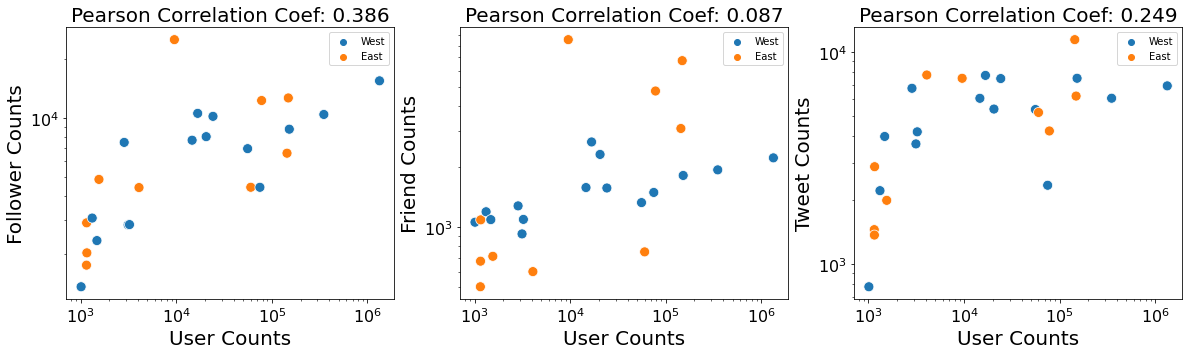

In [147]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].set(xscale="log", yscale='log')
sns.scatterplot(x = 'user_count', y = 'followers_count', hue=languages_stat.area.tolist(),
                data = languages_stat, ax = ax[0], s=100)
ax[0].set_xlabel('User Counts', fontsize = 20)
ax[0].set_ylabel('Follower Counts', fontsize = 20)
ax[0].set_title('Pearson Correlation Coef: 0.386', fontsize=20)
ax[0].xaxis.set_tick_params(labelsize=16)
ax[0].yaxis.set_tick_params(labelsize=16)

ax[1].set(xscale="log", yscale='log')
sns.scatterplot(x = 'user_count', y = 'friends_count', hue=languages_stat.area.tolist(),
                data = languages_stat, ax = ax[1], s = 100)
ax[1].set_xlabel('User Counts', fontsize = 20)
ax[1].set_ylabel('Friend Counts', fontsize = 20)
ax[1].set_title('Pearson Correlation Coef: 0.087', fontsize=20)
ax[1].xaxis.set_tick_params(labelsize=16)
ax[1].yaxis.set_tick_params(labelsize=16)

ax[2].set(xscale="log", yscale='log')
sns.scatterplot(x = 'user_count', y = 'statuses_count', hue=languages_stat.area.tolist(), 
                data = languages_stat, ax = ax[2], s=100)
ax[2].set_xlabel('User Counts', fontsize = 20)
ax[2].set_ylabel('Tweet Counts', fontsize = 20)
ax[2].set_title('Pearson Correlation Coef: 0.249', fontsize=20)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=16)

print(languages_stat['user_count'].corr(languages_stat['followers_count']))
print(languages_stat['user_count'].corr(languages_stat['friends_count']))
print(languages_stat['user_count'].corr(languages_stat['statuses_count']))

In [10]:
languages.groupby('area')[['followers_count', 'friends_count', 'statuses_count']].mean().reset_index()

area  followers_count  friends_count  statuses_count
0  east      9636.023589    4340.711849     7375.088166
1  west     13199.883693    2066.356154     6567.720647

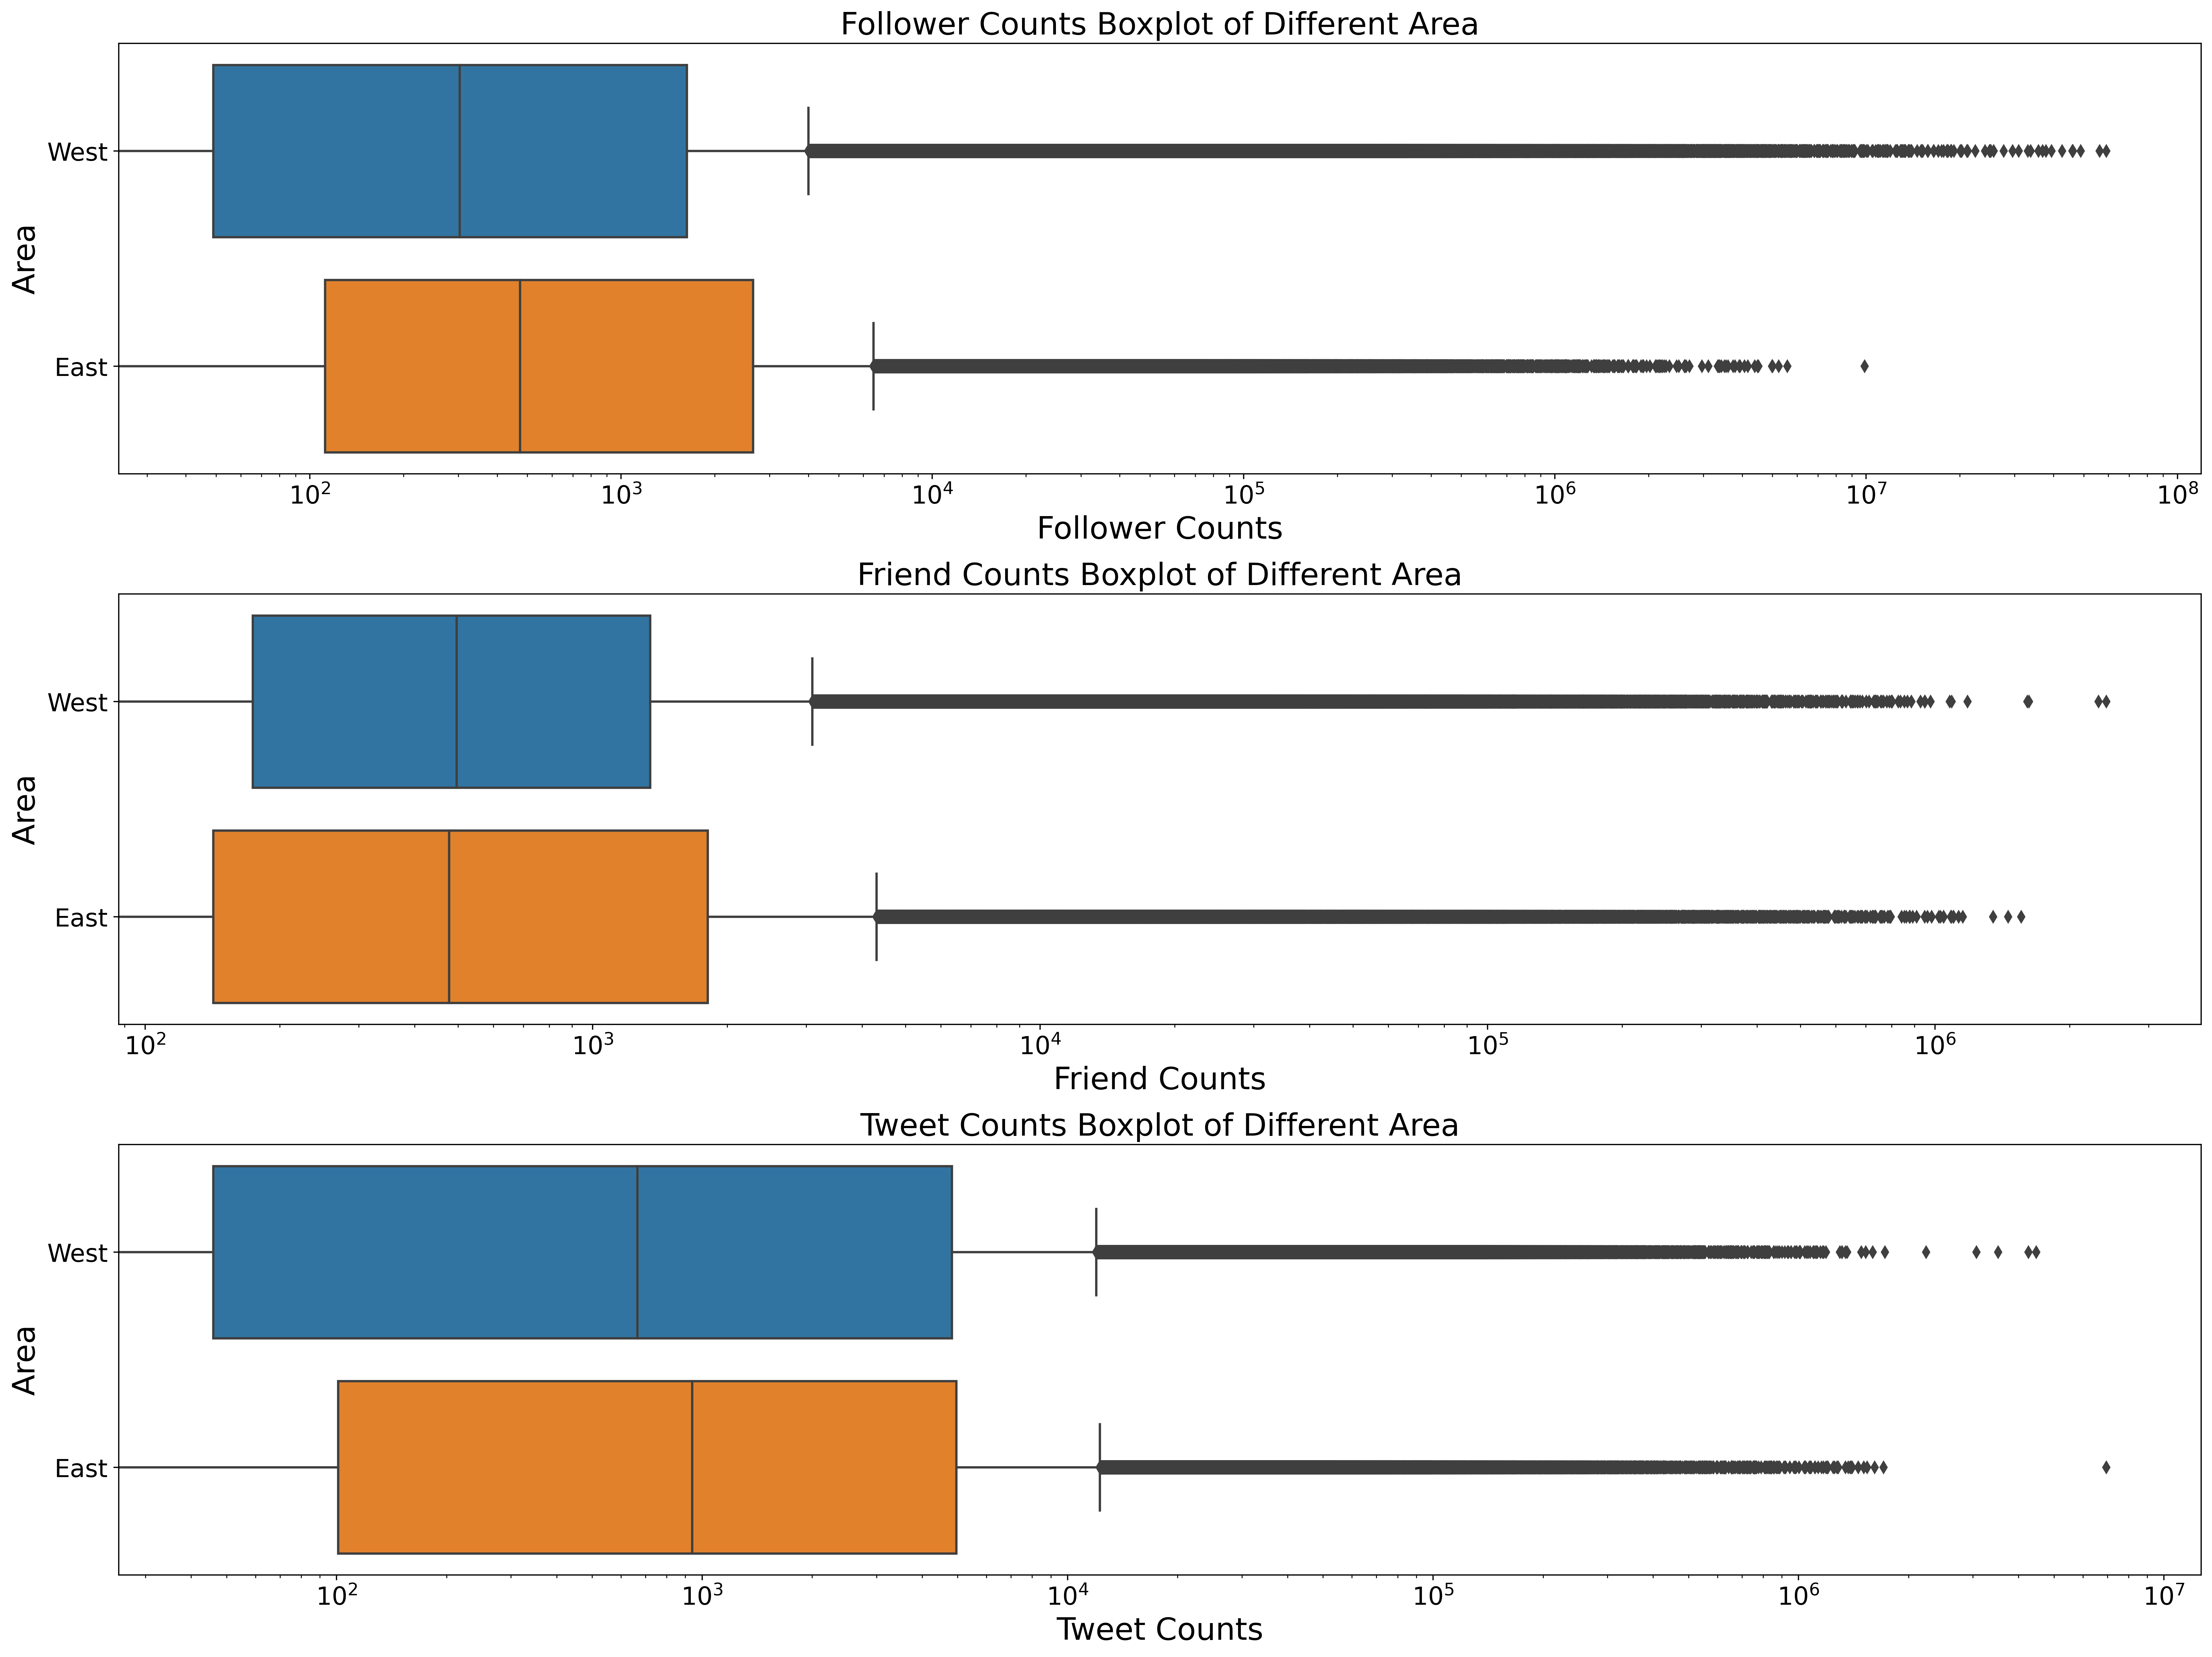

In [149]:
fig, ax = plt.subplots(3, 1, figsize = (20, 15), dpi = 400)

ax[0].set(xscale="log")
sns.boxplot( x = 'followers_count', y = 'area', data = languages, ax = ax[0])
ax[0].set_xlabel('Follower Counts', fontsize = 20)
ax[0].set_ylabel('Area', fontsize = 20)
ax[0].set_title('Follower Counts Boxplot of Different Area', fontsize=20)
ax[0].xaxis.set_tick_params(labelsize=16)
ax[0].yaxis.set_tick_params(labelsize=16)

ax[1].set(xscale="log")
sns.boxplot( x = 'friends_count', y = 'area', data = languages, ax = ax[1])
ax[1].set_xlabel('Friend Counts', fontsize = 20)
ax[1].set_ylabel('Area', fontsize = 20)
ax[1].set_title('Friend Counts Boxplot of Different Area', fontsize=20)
ax[1].xaxis.set_tick_params(labelsize=16)
ax[1].yaxis.set_tick_params(labelsize=16)

ax[2].set(xscale="log")
sns.boxplot( x = 'statuses_count', y = 'area',  data = languages, ax = ax[2])
ax[2].set_xlabel('Tweet Counts', fontsize = 20)
ax[2].set_ylabel('Area', fontsize = 20)
ax[2].set_title('Tweet Counts Boxplot of Different Area', fontsize=20)
ax[2].xaxis.set_tick_params(labelsize=16)
ax[2].yaxis.set_tick_params(labelsize=16)

fig.tight_layout()
plt.show()

In [154]:
a = languages_east['followers_count'].tolist()
b = languages_west['followers_count'].tolist()
print(stats.kstest(a, b))
print(stats.ttest_ind(a, b))

a = languages_east['friends_count'].tolist()
b = languages_west['friends_count'].tolist()
print(stats.kstest(a, b))
print(stats.ttest_ind(a, b))

a = languages_east['statuses_count'].tolist()
b = languages_west['statuses_count'].tolist()
print(stats.kstest(a, b))
print(stats.ttest_ind(a, b))


KstestResult(statistic=0.09266238118894404, pvalue=0.0)
Ttest_indResult(statistic=-12.750960788670671, pvalue=3.0874813425118447e-37)
KstestResult(statistic=0.07513387386339898, pvalue=0.0)
Ttest_indResult(statistic=103.24187374616064, pvalue=0.0)
KstestResult(statistic=0.06134073529967235, pvalue=0.0)
Ttest_indResult(statistic=22.430196008600074, pvalue=2.0487370873294272e-111)


In [155]:
ego_network = pd.read_csv("../Data/EgoNetworks.txt", sep = '\t')

In [156]:
ego_list = languages['ID'].tolist()
ego_network = ego_network[(ego_network['followerID'].isin(ego_list)) & (ego_network['followeeID'].isin(ego_list))]
ego_network.head()

egoID  followerID  followeeID
0      1           1     1573741
1      1           1     1662720
2      1           1     1968904
3      1           1     1970142
4      1           1     1970507

In [157]:
mapping_id_language = dict(zip(languages['ID'], languages['lang']))

def assign_lang(id):
    return mapping_id_language[id]

ego_network['lang1'] = ego_network['followerID'].apply(assign_lang)
ego_network['lang2'] = ego_network['followeeID'].apply(assign_lang)
ego_network['same_lang'] = np.where(ego_network['lang1'] == ego_network['lang2'], True, False)
ego_network['same_lang'].value_counts()

True     2977350
False     960550
Name: same_lang, dtype: int64

In [158]:
mapping_langauge = dict(zip(language_order, [i for i in range(0, 25)]))
language_order = languages_stat.index.tolist()

rows, cols = (25, 25) 
connection = [[0 for i in range(cols)] for j in range(rows)] 
follow_pair = list(zip(ego_network['lang1'], ego_network['lang2']))

for i, v in enumerate(follow_pair):
    connection[mapping_langauge[follow_pair[i][0]]][mapping_langauge[follow_pair[i][1]]] += 1

connection_dataframe = pd.DataFrame(connection, columns = language_order, index = language_order)  
connection_dataframe.head(25)

cs  fil  zh-tw  msa   da    fi  zh-cn    ca    sv   pl  ...     it  \
cs      63    0      1    0    2     0      1     0     1    2  ...      7   
fil      0   33      1    2    1     0      0     0     1    0  ...      4   
zh-tw    0    1    254    0    0     1     14     0     0    1  ...      4   
msa      0    0      0    2    0     0      0     0     0    0  ...      1   
da       0    0      0    0  120     1      1     0     8    0  ...      8   
fi       0    0      0    0    0  1402      0     0    14    1  ...      2   
zh-cn    0    0     13    0    1     0    136     0     7    0  ...      9   
ca       0    0      0    0    0     0      0  1669     0    0  ...      7   
sv       0    0      0    1    2     3      0     0  1236    2  ...     10   
pl       0    0      1    0    1     0      0     0     5  425  ...     16   
th       0    0      5    0    0     0     23     0     1    1  ...      6   
ko       0    1     17    0    2     0     48     0     0    1  ...     16   
nl       2    1      1    0   16     2      1     5     6    2  ...     47   
en-gb   11    4      6    0   12    14      5     8    41   89  ...    318   
de       4    1      1    0    9     9     14     3    32   20  ...    156   
it       2    0      0    2    2     3      2    11     5    5  ...  16473   
fr     311    3      3    1   10    16     15   519    29   15  ...    193   
id       0    6      2   14    0     1     18     5    10    4  ...    101   
ru      16    2      3    2   14     7      8     4    32   30  ...    197   
tr       3    4      2    2   11     2      1     6    28   12  ...     79   
ja       2    4    108    2    1     1     59     1     8    2  ...     30   
ar       1    6      4    7    4     2      8     8    18    7  ...     80   
pt       3    2      2    6    9     4     30     7    22   21  ...    463   
es      22    9     17    4   52    33     32  1913   125  101  ...   1539   
en      93  568    202  695  446   463    426   519  1966  497  ...   5289   

          fr     id     ru      tr      ja      ar      pt      es       en  
cs       139      2     17      18       5      27      29      79     1135  
fil        4      8      1       8       4       7      11      23     3073  
zh-tw     11      9     82       2     249       3       6      37     1011  
msa        0     18      1       2       0       7       4       7      963  
da        20      1      7      15       2       9      26      61     1755  
fi        10      1      3       4       1       3      12      28     1055  
zh-cn     25      6     19      12     125      10      37      60     2431  
ca       346      0      2       4       1       3       6    2400      647  
sv        27      5     10      41       6      18      25      99     2642  
pl        23      6     13      14       2      18      55     147     3392  
th        28     67     11      11      60      15      40      94     5819  
ko        50     18     20      27     312      48     114     132     5331  
nl       137     52     41     167       6      57     143     318     9505  
en-gb    725    344    166     200      66     563     585    1730    20915  
de       553     41    315     827     246     216     344    1727    18918  
it       282    288     67     138      19      84     583    1480    13661  
fr     32447    161    262     523     174    1680     672    1699    41378  
id       161  30963     60     328     226     319     305     807    54220  
ru       730    459  60135     850     515    1672     732    1474    48214  
tr       363    149    333  106747     110     857     559     877    21925  
ja       108    103    321     119  226120     500     319     400    15099  
ar       778    276    261     755     361  208066     905    1543    66883  
pt       440    729   1043    1513     577    3506  156655    9935    57374  
es      1860   1209   1773    5182     848   12557   12678  398216   149450  
en     11502  34995   8117   

In [161]:
fig, ax = plt.subplots(25, 1, figsize = (20, 125), dpi = 400)

for i in range(25):
    ax[i].set(yscale = 'log')
    sns.barplot(x = languages_stat.index, y = connection[i], ax = ax[i])

plt.show()

In [110]:
languages.head()

ID  followers_count  friends_count  statuses_count lang  area
0   1             30.0             28             9.0   en  West
1   2              2.0              8             7.0   en  West
2   3              1.0              0             0.0   fr  West
3   4              3.0              3            68.0   en  West
4   5             65.0            118           748.0   fr  West

In [114]:
sample_user = languages_west.sample(100)['ID'].tolist()
sample_user += languages_east.sample(100)['ID'].tolist()

In [115]:
G = nx.Graph()